### Statistics Class: Lab 1 Solutions  

In [1]:
#Import Needed Libraries for the lab
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline  

**Business Question:** When cooling begins, is it usually hotter in the space heated by VAVCO 3-06 than the space heated by VAVCO 4-06?

Compare temperatures using:
- Two-sample t-test
- Paired t-test

In [2]:
# Step 1: Load and check the data
df = pd.read_excel('../Datasets/VAV_3-06_4-06_Stacked.xlsx')
df.head()

,Start.time of VAVCO 3-06 ETF,Start.time of VAVCO 4-06 ETF,VAV,VAV Unit,RmTemp
0,2017-03-15 07:00:00,2017-03-15 07:01:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.5
1,2017-04-03 07:00:00,2017-04-03 07:00:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,74.0
2,2017-04-04 07:04:00,2017-04-04 07:04:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0
3,2017-04-05 07:01:00,2017-04-05 07:01:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0
4,2017-04-06 07:03:00,2017-04-06 07:08:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0


In [3]:
# check data types and quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
Start.time of VAVCO 3-06 ETF    118 non-null datetime64[ns]
Start.time of VAVCO 4-06 ETF    118 non-null datetime64[ns]
VAV                             118 non-null object
VAV Unit                        118 non-null object
RmTemp                          118 non-null float64
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 4.7+ KB


### b. Create a histogram and boxplot of variable RmTemp

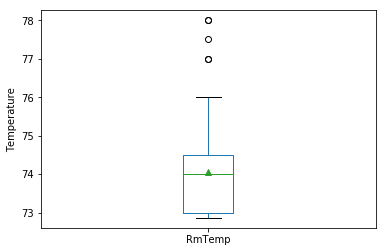

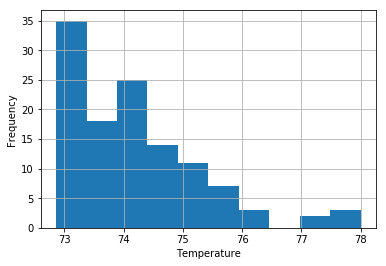

In [4]:
# Hist/boxplot of all data
df.boxplot(
    column=['RmTemp'],
    grid=False,
    showmeans=True
)
plt.ylabel('Temperature')
plt.show()

df.hist(
    column=['RmTemp']
)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('')
plt.show()

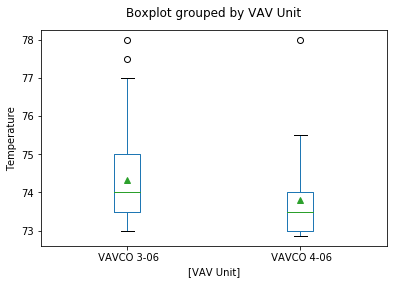

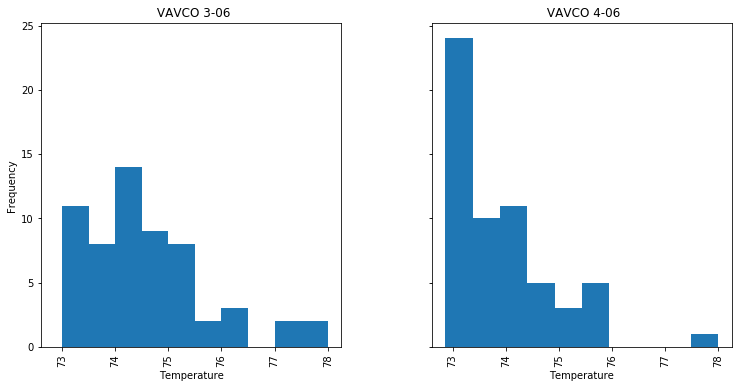

In [5]:
# Hist/boxplot of all data, grouped by room
df.boxplot(
    column=['RmTemp'],
    grid=False,
    showmeans=True,
    by=['VAV Unit']
)
plt.ylabel('Temperature')
plt.title('')
plt.show()

ax = df.hist(
    column=['RmTemp'],
    by=['VAV Unit'],
    sharex=True,
    sharey=True,
    figsize=(12,6)
)

ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Temperature')

plt.show()

### d. Does the data for the VAV 3-06 unit support a hypothesis that the mean room starting temperature does not exceed 73.5 degrees?

In [6]:
# separate the temperature for VAVCO 3-06
temp_vav306 = df['RmTemp'][df['VAV Unit']==' VAVCO 3-06']

mu0 = 73.5  # hypothesized starting temperature

res = stats.ttest_1samp(temp_vav306,mu0)   #this will return a two-tailed result

print('t-score = %.2f' % res.statistic)
print('p = %.2e' % (res.pvalue/2))    #divide by 2 to get one-tailed p-value

t-score = 5.51
p = 4.24e-07


**Answer:** Since $p<.05$, we reject the null hypothesis. The data are consistent with the hypothesis that the rooms start the day at different temperatures.

### e. Construct a 95% confidence interval for the mean room start temperature for VAV 3-06

In [7]:
(mean,var,stdev) = stats.bayes_mvs(temp_vav306, alpha=.95)
mean

Mean(statistic=74.33898305084746, minmax=(74.03441725536977, 74.64354884632515))

**Answer:** Since 74 degrees lies outside the 95% confidence interval, the data do not support the conclusion that the mean start temperature is 74 degrees.